In [15]:
#Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress


**Step 2: Merge 70+ separate country files into one central file enabling per-country, global analysis (provide this overview as explanation for every major piece of coding)

In [16]:
#Merge country data files into one combined dataframe "df_combined" for analysis

dict_combined = {"Country": []}
list_columns = []
df_current = pd.read_csv('resources/Argentina.csv')
for column, dtype in df_current.dtypes.items():
    if dtype in ['float64', 'int64']:
        dict_combined[f'average_{column}'] = []
        list_columns.append(column)
for file in os.listdir('resources'):
    country = file.removesuffix('.csv')
    dict_combined["Country"].append(country)
    df_current = pd.read_csv('resources/'+file)
    for column in list_columns:
        curr_avg = df_current[column].mean()
        dict_combined[f'average_{column}'].append(curr_avg)
df_combined = pd.DataFrame.from_dict(dict_combined)
df_combined.set_index('Country', inplace=True)

In [17]:
#Display the "df_combined" dataframe (don't need to provide the step 2 overview for minor steps like this dataframe display code)
df_combined

,average_danceability,average_energy,average_key,average_loudness,average_mode,average_speechiness,average_acousticness,average_instrumentalness,average_liveness,average_valence,average_tempo,average_duration_ms,average_time_signature
Country,,,,,,,,,,,,,
Netherlands,0.67650,0.686040,4.86,-6.26238,0.50,0.070188,0.217257,0.003452,0.174374,0.542820,125.45492,182065.48,3.88
Philippines,0.61346,0.534020,6.04,-7.96964,0.68,0.063190,0.316180,0.005927,0.133892,0.497158,119.74060,214648.96,3.94
New Zealand,0.65074,0.615160,4.64,-6.93512,0.74,0.070252,0.264744,0.012686,0.195618,0.462698,126.88068,198469.30,3.82
Singapore,0.61918,0.646520,5.24,-6.28290,0.74,0.060720,0.209556,0.005410,0.153822,0.477044,123.86970,212453.00,3.92
Peru,0.75226,0.701320,6.22,-5.07272,0.46,0.100992,0.225994,0.001502,0.152234,0.577720,111.77808,190702.70,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guatemala,0.73814,0.682180,6.12,-6.02928,0.50,0.075010,0.226326,0.001883,0.155818,0.643500,123.47310,186455.34,3.66
Honduras,0.74060,0.710320,6.30,-5.17688,0.44,0.101518,0.218258,0.001818,0.180006,0.600060,118.84224,192070.72,3.84
Taiwan,0.65482,0.624442,5.74,-6.56560,0.72,0.065824,0.285311,0.000267,0.175740,0.516720,126.09816,195087.80,3.92


**Step 3: Use central, global, per-country dataframe to compare Acousticness vs. Loudness globally. Correlation is highly negative.

In [18]:
#Compare Acousticness vs. Loudness globally
#Calculate correlation coeeficient using Pearson's R correlation method
correlation_coefficient, p_value = pearsonr(df_combined['average_acousticness'], df_combined['average_loudness'])
print(f"The correlation coefficient between acousticness and loudness is: {correlation_coefficient}")
print(f"The p-value is: {p_value:.4f}")

The correlation coefficient between acousticness and loudness is: -0.4229441337975898
The p-value is: 0.0003


**Step 4: Use central database to run a linear regression across countries, visualize negative correlation/regression results. Finding: The more acoustic an album is the less loud it tends to be.

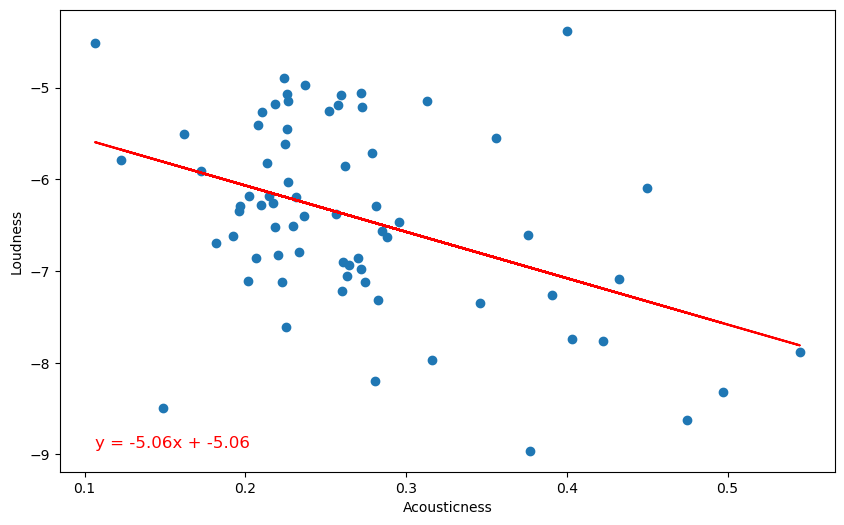

In [19]:
#Compare Acousticness vs. Loudness globally
#Define a function to create Linear Regression plots for "acousticness" and "loudness"
#fit the linear regression model
(slope, intercept, r_value, _, _) = linregress(df_combined['average_acousticness'], df_combined['average_loudness'])

#Create a range of acousticness for predictions
acoustic_range = df_combined['average_acousticness']

#Calculate the corresponding loudness using the linear model
predicted_loudness = slope * acoustic_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(df_combined['average_acousticness'], df_combined['average_loudness'], label='Actual Data')
plt.plot(df_combined['average_acousticness'], predicted_loudness, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Locate output text
plt.text(x=min(df_combined['average_acousticness']), y=min(df_combined['average_loudness']),
         s=regression_eq,
         fontsize=12,
         color='red',
         verticalalignment='bottom')

plt.xlabel('Acousticness')
plt.ylabel('Loudness')

plt.show()

In [20]:
#Compare Loudness vs. Danceability globally
#Calculate correlation coeeficient using Pearson's R correlation method
correlation_coefficient, p_value = pearsonr(df_combined['average_loudness'], df_combined['average_danceability'])
print(f"The correlation coefficient between loudness and danceability is: {correlation_coefficient}")
print(f"The p-value is: {p_value:.4f}")

The correlation coefficient between loudness and danceability is: 0.4388743178493125
The p-value is: 0.0001


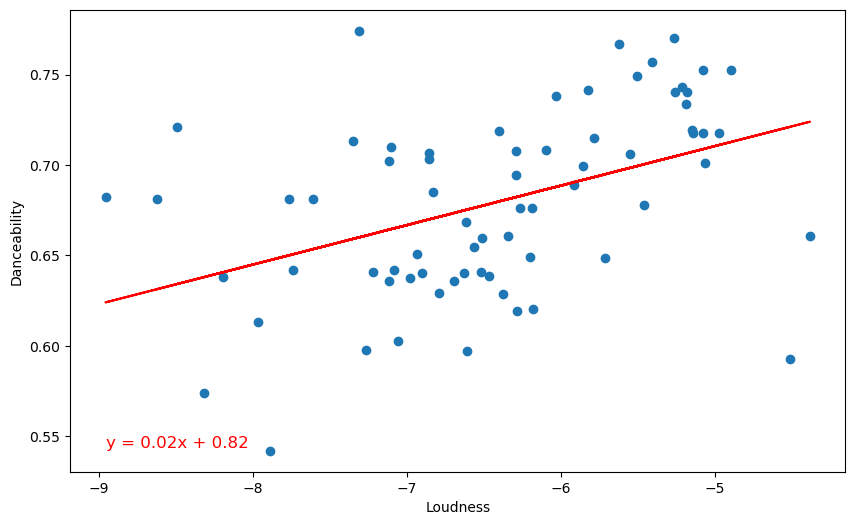

In [21]:
#Compare Loudness vs. Danceability globally
#Define a function to create Linear Regression plots for "loudness" and "danceability"
#fit the linear regression model
(slope, intercept, r_value, _, _) = linregress(df_combined['average_loudness'], df_combined['average_danceability'])

#Create a range of acousticness for predictions
loud_range = df_combined['average_loudness']

#Calculate the corresponding loudness using the linear model
predicted_danceability = slope * loud_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(df_combined['average_loudness'], df_combined['average_danceability'], label='Actual Data')
plt.plot(df_combined['average_loudness'], predicted_danceability, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Locate output text
plt.text(x=min(df_combined['average_loudness']), y=min(df_combined['average_danceability']),
         s=regression_eq,
         fontsize=12,
         color='red',
         verticalalignment='bottom')

plt.xlabel('Loudness')
plt.ylabel('Danceability')

plt.show()

In [22]:
#Compare Energy vs. Danceability globally
#Calculate correlation coeeficient using Pearson's R correlation method
correlation_coefficient, p_value = pearsonr(df_combined['average_energy'], df_combined['average_danceability'])
print(f"The correlation coefficient between energy and danceability is: {correlation_coefficient}")
print(f"The p-value is: {p_value:.4f}")

The correlation coefficient between energy and danceability is: 0.5447257195769478
The p-value is: 0.0000


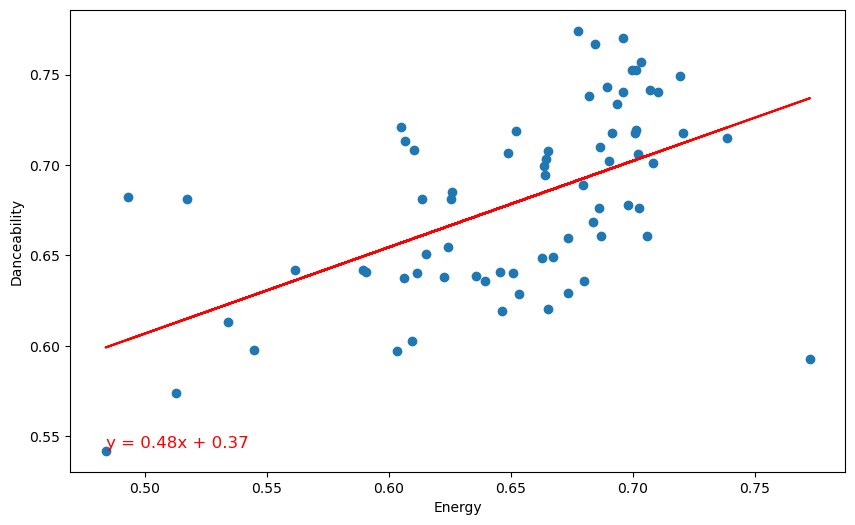

In [23]:
#Compare Energy vs. Danceability globally
#Define a function to create Linear Regression plots for "energy" and "danceability"
#fit the linear regression model
(slope, intercept, r_value, _, _) = linregress(df_combined['average_energy'], df_combined['average_danceability'])

#Create a range of acousticness for predictions
energy_range = df_combined['average_energy']

#Calculate the corresponding loudness using the linear model
predicted_danceability = slope * energy_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(df_combined['average_energy'], df_combined['average_danceability'], label='Actual Data')
plt.plot(df_combined['average_energy'], predicted_danceability, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Locate output text
plt.text(x=min(df_combined['average_energy']), y=min(df_combined['average_danceability']),
         s=regression_eq,
         fontsize=12,
         color='red',
         verticalalignment='bottom')

plt.xlabel('Energy')
plt.ylabel('Danceability')

plt.show()

In [24]:
#Compare Speechiness vs. Valence globally
#Calculate correlation coeeficient using Pearson's R correlation method
correlation_coefficient, p_value = pearsonr(df_combined['average_speechiness'], df_combined['average_valence'])
print(f"The correlation coefficient between speechiness and valence is: {correlation_coefficient}")
print(f"The p-value is: {p_value:.4f}")

The correlation coefficient between speechiness and valence is: 0.3211633018769513
The p-value is: 0.0067


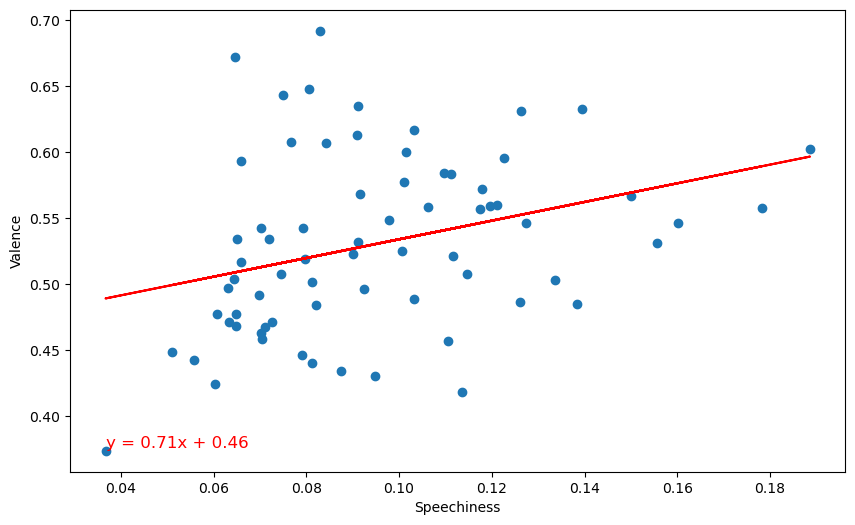

In [25]:
#Compare Speechiness vs. Valence globally
#Define a function to create Linear Regression plots for "speechiness" and "valence"
#fit the linear regression model
(slope, intercept, r_value, _, _) = linregress(df_combined['average_speechiness'], df_combined['average_valence'])

#Create a range of valence for predictions
speechiness_range = df_combined['average_speechiness']

#Calculate the corresponding loudness using the linear model
predicted_valence = slope * speechiness_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(df_combined['average_speechiness'], df_combined['average_valence'], label='Actual Data')
plt.plot(df_combined['average_speechiness'], predicted_valence, color='red', label='Regression Line')

#Annotate the plot with the regression equation
regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"

#Locate output text
plt.text(x=min(df_combined['average_speechiness']), y=min(df_combined['average_valence']),
         s=regression_eq,
         fontsize=12,
         color='red',
         verticalalignment='bottom')

plt.xlabel('Speechiness')
plt.ylabel('Valence')

plt.show()

In [28]:
#Display the minimum values for each country per each music attribute
#Group by 'Country' and calculate the minimum for each country across all columns
min_values_by_country = df_combined.groupby('Country').min()

#Display the dataframe using Country as index
min_values_by_country


,average_danceability,average_energy,average_key,average_loudness,average_mode,average_speechiness,average_acousticness,average_instrumentalness,average_liveness,average_valence,average_tempo,average_duration_ms,average_time_signature
Country,,,,,,,,,,,,,
Argentina,0.71952,0.701120,6.30,-5.14470,0.44,0.080586,0.226439,0.010980,0.183288,0.648220,114.90942,188632.52,3.94
Australia,0.64048,0.611760,4.54,-6.89862,0.70,0.063246,0.260942,0.012912,0.161468,0.471300,124.90580,198500.22,3.82
Austria,0.65986,0.673400,4.86,-6.50878,0.68,0.081260,0.229675,0.015794,0.168988,0.501740,125.70128,176416.02,3.88
Belarus,0.68502,0.625920,4.86,-6.82792,0.50,0.114594,0.220469,0.078796,0.204350,0.507874,122.98996,152020.54,3.94
Belgium,0.64024,0.650722,4.46,-6.62554,0.60,0.069752,0.287933,0.029746,0.153696,0.491536,124.03182,191023.86,3.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0.70650,0.648680,5.34,-6.85588,0.48,0.091176,0.270200,0.070770,0.163126,0.531860,119.75996,147690.40,3.84
United Kingdom,0.64072,0.645582,4.32,-6.51994,0.68,0.070472,0.218748,0.010437,0.189872,0.458360,123.38872,198548.38,3.84
Uruguay,0.71754,0.691340,6.04,-4.96806,0.52,0.083002,0.237195,0.010901,0.183256,0.692160,115.19060,171781.10,3.90


In [29]:
#Display the maximum values for each country per each music attribute
#Group by 'Country' and calculate the minimum for each country across all columns
max_values_by_country = df_combined.groupby('Country').max()

#Display the dataframe using Country as index
max_values_by_country



,average_danceability,average_energy,average_key,average_loudness,average_mode,average_speechiness,average_acousticness,average_instrumentalness,average_liveness,average_valence,average_tempo,average_duration_ms,average_time_signature
Country,,,,,,,,,,,,,
Argentina,0.71952,0.701120,6.30,-5.14470,0.44,0.080586,0.226439,0.010980,0.183288,0.648220,114.90942,188632.52,3.94
Australia,0.64048,0.611760,4.54,-6.89862,0.70,0.063246,0.260942,0.012912,0.161468,0.471300,124.90580,198500.22,3.82
Austria,0.65986,0.673400,4.86,-6.50878,0.68,0.081260,0.229675,0.015794,0.168988,0.501740,125.70128,176416.02,3.88
Belarus,0.68502,0.625920,4.86,-6.82792,0.50,0.114594,0.220469,0.078796,0.204350,0.507874,122.98996,152020.54,3.94
Belgium,0.64024,0.650722,4.46,-6.62554,0.60,0.069752,0.287933,0.029746,0.153696,0.491536,124.03182,191023.86,3.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0.70650,0.648680,5.34,-6.85588,0.48,0.091176,0.270200,0.070770,0.163126,0.531860,119.75996,147690.40,3.84
United Kingdom,0.64072,0.645582,4.32,-6.51994,0.68,0.070472,0.218748,0.010437,0.189872,0.458360,123.38872,198548.38,3.84
Uruguay,0.71754,0.691340,6.04,-4.96806,0.52,0.083002,0.237195,0.010901,0.183256,0.692160,115.19060,171781.10,3.90
